<a href="https://colab.research.google.com/github/wandersonlimabh-star/Analises-Wanderson/blob/main/NPS%20(Rodrigo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça upload do arquivo NPS.xlsx:


Saving NPS.xlsx to NPS.xlsx
Iniciando análise dos dados NPS...
Dados carregados: 1580 registros
Métricas calculadas com sucesso!
Gerando visualizações...


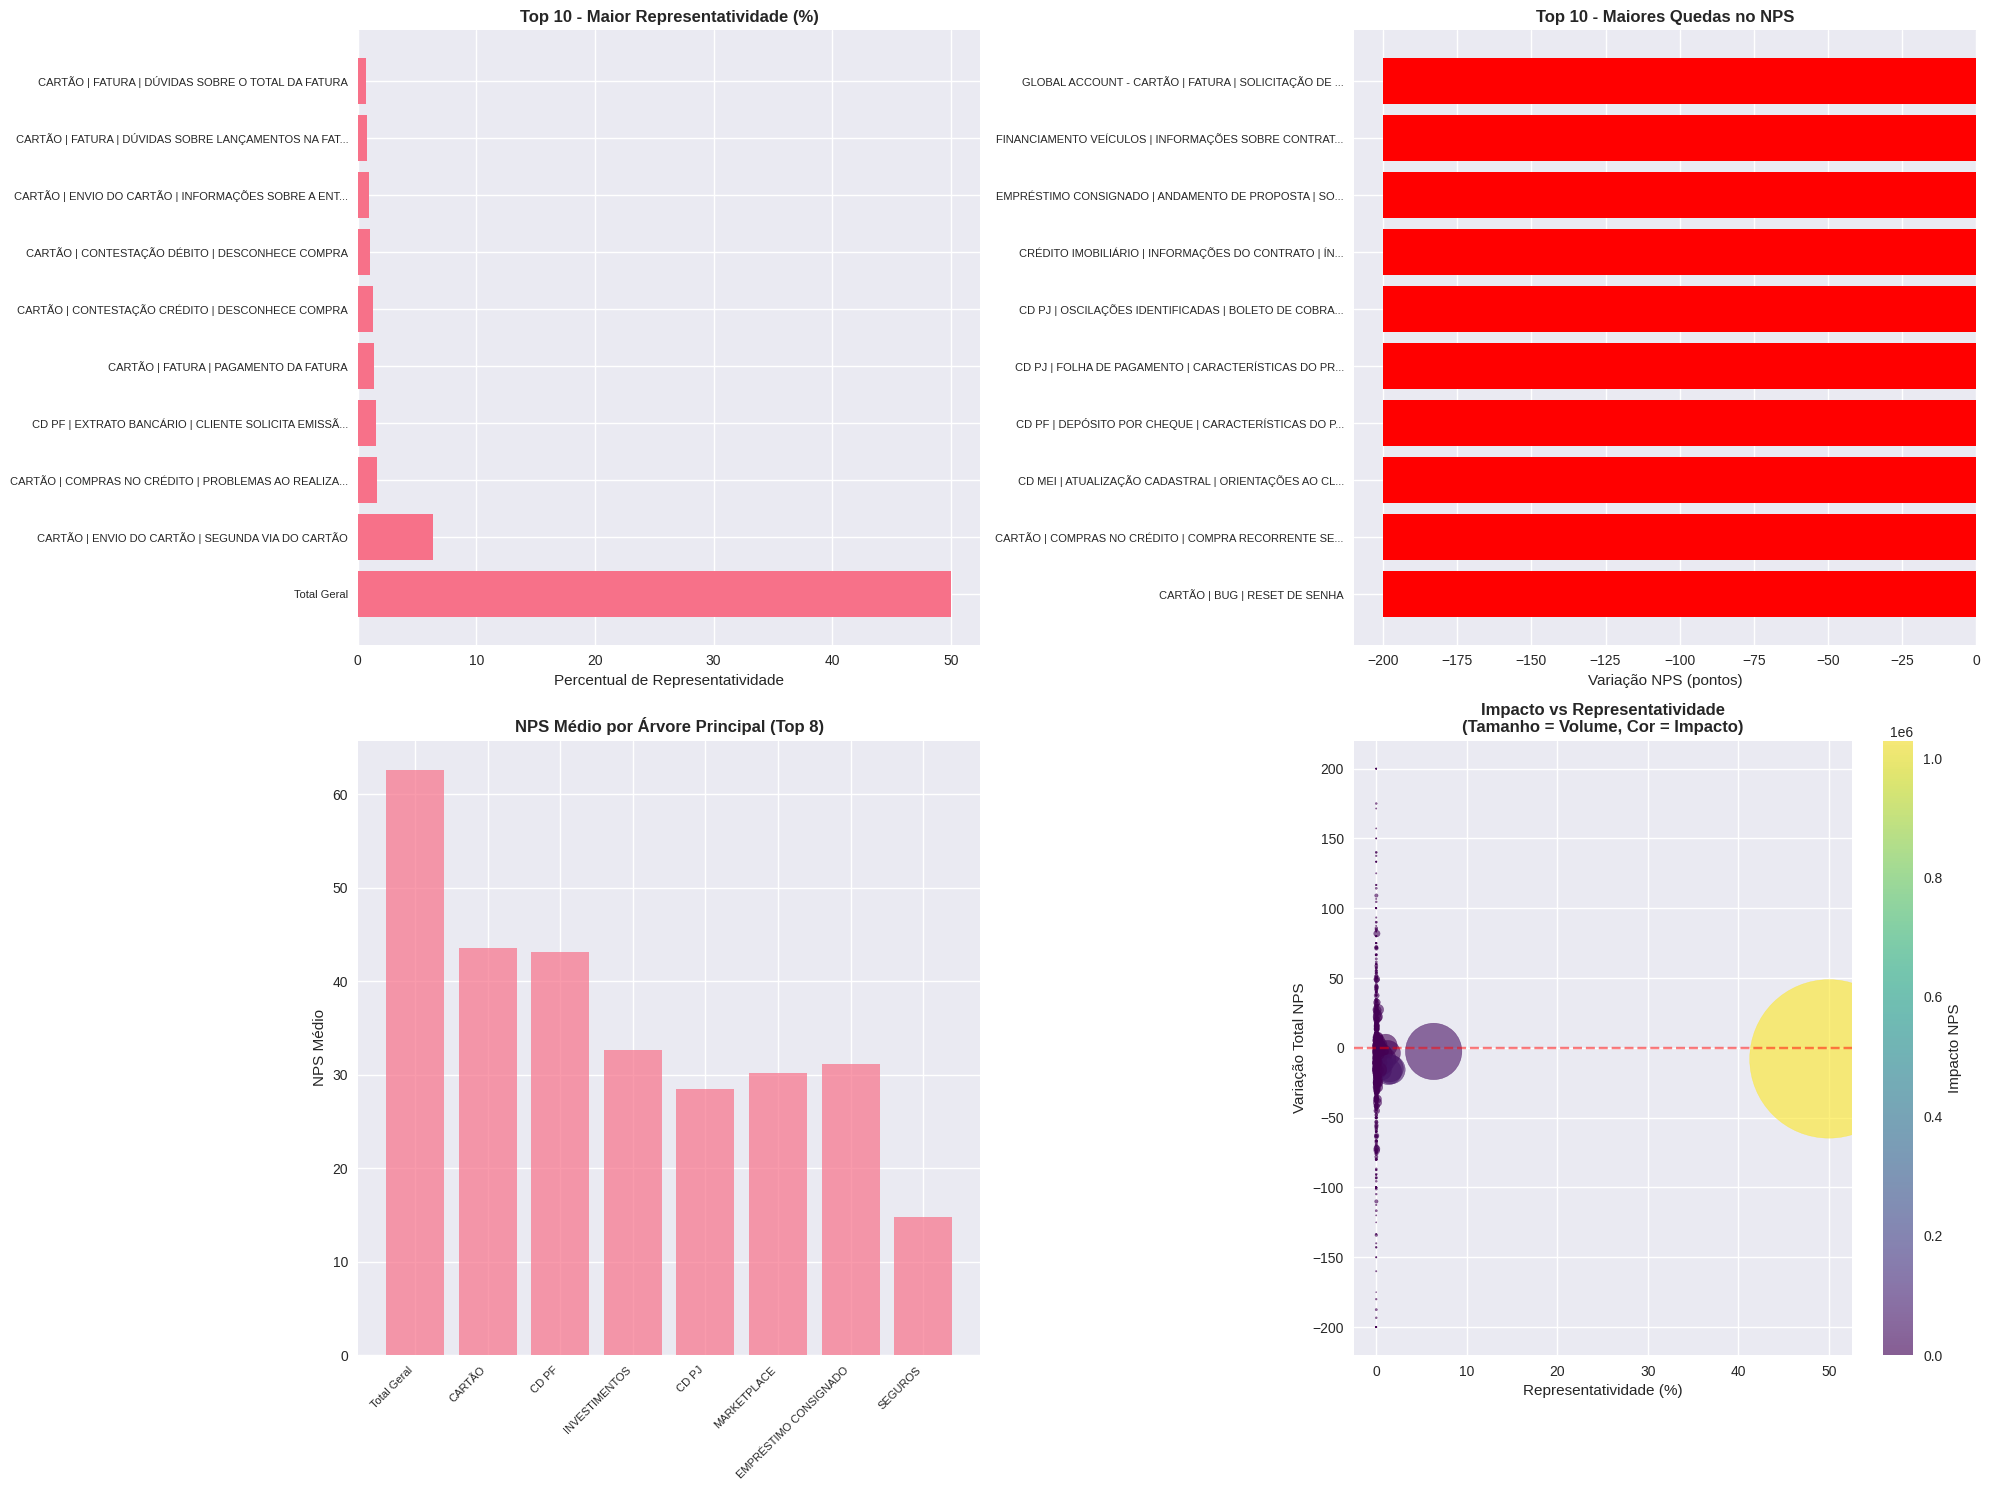


RESUMO EXECUTIVO - ANÁLISE NPS

📊 REPRESENTATIVIDADE:
Total de motivos analisados: 1580
Motivos com maior representatividade:
  • Total Geral... | 50.00%
  • CARTÃO | ENVIO DO CARTÃO | SEGUNDA VIA DO CARTÃO... | 6.35%
  • CARTÃO | COMPRAS NO CRÉDITO | PROBLEMAS AO REALIZAR COMPRA... | 1.63%
  • CD PF | EXTRATO BANCÁRIO | CLIENTE SOLICITA EMISSÃO... | 1.49%
  • CARTÃO | FATURA | PAGAMENTO DA FATURA... | 1.36%

📉 MAIORES QUEDAS NO NPS:
Motivos com queda: 661
Maiores quedas identificadas:
  • CARTÃO | BUG | RESET DE SENHA... | Queda: -200.00 pontos
  • CARTÃO | COMPRAS NO CRÉDITO | COMPRA RECORRENTE SEM LIMITE D... | Queda: -200.00 pontos
  • CD MEI | ATUALIZAÇÃO CADASTRAL | ORIENTAÇÕES AO CLIENTE... | Queda: -200.00 pontos
  • CD PF | DEPÓSITO POR CHEQUE | CARACTERÍSTICAS DO PRODUTO... | Queda: -200.00 pontos
  • CD PJ | FOLHA DE PAGAMENTO | CARACTERÍSTICAS DO PRODUTO... | Queda: -200.00 pontos

🎯 MAIOR IMPACTO NO RESULTADO GERAL:
  • Total Geral... | Impacto: 1029022.91
  • CARTÃO | CO

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Upload do arquivo
print("Faça upload do arquivo NPS.xlsx:")
uploaded = files.upload()

# Leitura dos dados
df = pd.read_excel(list(uploaded.keys())[0])

# Preparação dos dados
def preparar_dados(df):
    # Renomear colunas para facilitar o trabalho
    colunas = {
        'Motivo Pesquisa (Julho)': 'Motivo',
        'NPS (Julho)': 'NPS_Jul',
        'PEsquisa (Agosto)': 'Pesq_Ago',
        'NPS (Agosto)': 'NPS_Ago',
        'Pesquisa (Setembro)': 'Pesq_Set',
        'NPS (Setembro)': 'NPS_Set'
    }

    if 'Pesquisa (Julho)' in df.columns:
        colunas['Pesquisa (Julho)'] = 'Pesq_Jul'

    df_clean = df.rename(columns=colunas)

    # Preencher valores ausentes
    for col in ['Pesq_Jul', 'Pesq_Ago', 'Pesq_Set']:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna(0)

    df_clean[['NPS_Jul', 'NPS_Ago', 'NPS_Set']] = df_clean[['NPS_Jul', 'NPS_Ago', 'NPS_Set']].fillna(0)

    return df_clean

def calcular_metricas(df):
    resultados = []

    for idx, row in df.iterrows():
        motivo = row['Motivo']

        # Volume de pesquisas (estimativa se não tiver coluna específica)
        vol_jul = row.get('Pesq_Jul', 0)
        vol_ago = row.get('Pesq_Ago', 0)
        vol_set = row.get('Pesq_Set', 0)

        # NPS por mês
        nps_jul = row['NPS_Jul']
        nps_ago = row['NPS_Ago']
        nps_set = row['NPS_Set']

        # Cálculos
        vol_total = vol_jul + vol_ago + vol_set
        nps_medio = np.mean([nps_jul, nps_ago, nps_set]) if vol_total > 0 else 0

        # Variações
        var_jul_ago = nps_ago - nps_jul if nps_jul != 0 else 0
        var_ago_set = nps_set - nps_ago if nps_ago != 0 else 0
        var_total = nps_set - nps_jul if nps_jul != 0 else 0

        # Representatividade
        representatividade = vol_total / df[[c for c in df.columns if 'Pesq_' in c]].sum().sum() * 100 if vol_total > 0 else 0

        # Impacto no NPS (volume * variação)
        impacto_nps = vol_total * abs(var_total) if vol_total > 0 else 0

        # Extrair árvore principal
        arvore_principal = motivo.split(' | ')[0] if ' | ' in str(motivo) else str(motivo)

        resultados.append({
            'Motivo': motivo,
            'Arvore_Principal': arvore_principal,
            'Vol_Total': vol_total,
            'Vol_Jul': vol_jul,
            'Vol_Ago': vol_ago,
            'Vol_Set': vol_set,
            'NPS_Jul': nps_jul,
            'NPS_Ago': nps_ago,
            'NPS_Set': nps_set,
            'NPS_Medio': nps_medio,
            'Var_Jul_Ago': var_jul_ago,
            'Var_Ago_Set': var_ago_set,
            'Var_Total': var_total,
            'Representatividade_Perc': representatividade,
            'Impacto_NPS': impacto_nps
        })

    return pd.DataFrame(resultados)

def gerar_analises(df_resultado):
    # Top 10 por representatividade
    top_representatividade = df_resultado.nlargest(10, 'Representatividade_Perc')

    # Top 10 maiores quedas
    maiores_quedas = df_resultado[df_resultado['Var_Total'] < 0].nsmallest(10, 'Var_Total')

    # Top 10 maior impacto negativo
    maior_impacto = df_resultado[df_resultado['Var_Total'] < 0].nlargest(10, 'Impacto_NPS')

    # Análise por árvore principal
    analise_arvore = df_resultado.groupby('Arvore_Principal').agg({
        'Vol_Total': 'sum',
        'NPS_Medio': 'mean',
        'Var_Total': 'mean',
        'Representatividade_Perc': 'sum',
        'Impacto_NPS': 'sum'
    }).reset_index()

    analise_arvore = analise_arvore.sort_values('Representatividade_Perc', ascending=False)

    return top_representatividade, maiores_quedas, maior_impacto, analise_arvore

def criar_visualizacoes(df_resultado, top_repr, maiores_quedas, analise_arvore):
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))

    # Gráfico 1: Top Representatividade
    axes[0,0].barh(range(len(top_repr[:10])), top_repr['Representatividade_Perc'][:10])
    axes[0,0].set_yticks(range(len(top_repr[:10])))
    axes[0,0].set_yticklabels([x[:50] + '...' if len(x) > 50 else x for x in top_repr['Motivo'][:10]], fontsize=8)
    axes[0,0].set_title('Top 10 - Maior Representatividade (%)', fontsize=12, fontweight='bold')
    axes[0,0].set_xlabel('Percentual de Representatividade')

    # Gráfico 2: Maiores Quedas
    axes[0,1].barh(range(len(maiores_quedas[:10])), maiores_quedas['Var_Total'][:10], color='red')
    axes[0,1].set_yticks(range(len(maiores_quedas[:10])))
    axes[0,1].set_yticklabels([x[:50] + '...' if len(x) > 50 else x for x in maiores_quedas['Motivo'][:10]], fontsize=8)
    axes[0,1].set_title('Top 10 - Maiores Quedas no NPS', fontsize=12, fontweight='bold')
    axes[0,1].set_xlabel('Variação NPS (pontos)')

    # Gráfico 3: Evolução NPS por Árvore Principal
    top_arvores = analise_arvore.head(8)
    x = np.arange(len(top_arvores))
    axes[1,0].bar(x, top_arvores['NPS_Medio'], alpha=0.7)
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(top_arvores['Arvore_Principal'], rotation=45, ha='right', fontsize=8)
    axes[1,0].set_title('NPS Médio por Árvore Principal (Top 8)', fontsize=12, fontweight='bold')
    axes[1,0].set_ylabel('NPS Médio')

    # Gráfico 4: Impacto vs Representatividade
    scatter = axes[1,1].scatter(df_resultado['Representatividade_Perc'], df_resultado['Var_Total'],
                               s=df_resultado['Vol_Total']/10, alpha=0.6, c=df_resultado['Impacto_NPS'], cmap='viridis')
    axes[1,1].set_xlabel('Representatividade (%)')
    axes[1,1].set_ylabel('Variação Total NPS')
    axes[1,1].set_title('Impacto vs Representatividade\n(Tamanho = Volume, Cor = Impacto)', fontsize=12, fontweight='bold')
    axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

    plt.colorbar(scatter, ax=axes[1,1], label='Impacto NPS')
    plt.tight_layout()
    plt.show()

def gerar_relatorio_excel(df_resultado, top_repr, maiores_quedas, maior_impacto, analise_arvore):
    with pd.ExcelWriter('Analise_NPS_Completa.xlsx', engine='xlsxwriter') as writer:
        # Aba 1: Dados Completos
        df_resultado.to_excel(writer, sheet_name='Dados_Completos', index=False)

        # Aba 2: Top Representatividade
        top_repr.to_excel(writer, sheet_name='Top_Representatividade', index=False)

        # Aba 3: Maiores Quedas
        maiores_quedas.to_excel(writer, sheet_name='Maiores_Quedas', index=False)

        # Aba 4: Maior Impacto
        maior_impacto.to_excel(writer, sheet_name='Maior_Impacto', index=False)

        # Aba 5: Análise por Árvore
        analise_arvore.to_excel(writer, sheet_name='Analise_Arvores', index=False)

        # Aba 6: Resumo Executivo
        resumo = pd.DataFrame({
            'Métrica': ['Total de Motivos Analisados', 'Motivos com Queda no NPS', 'Maior Queda Individual (pontos)',
                       'Árvore com Maior Representatividade', 'Maior Impacto Negativo'],
            'Valor': [len(df_resultado),
                     len(df_resultado[df_resultado['Var_Total'] < 0]),
                     f"{maiores_quedas['Var_Total'].min():.2f}",
                     analise_arvore.iloc[0]['Arvore_Principal'],
                     f"{maior_impacto['Impacto_NPS'].max():.2f}"]
        })
        resumo.to_excel(writer, sheet_name='Resumo_Executivo', index=False)

# Execução principal
print("Iniciando análise dos dados NPS...")

# Preparar dados
df_clean = preparar_dados(df)
print(f"Dados carregados: {len(df_clean)} registros")

# Calcular métricas
df_resultado = calcular_metricas(df_clean)
print("Métricas calculadas com sucesso!")

# Gerar análises
top_repr, maiores_quedas, maior_impacto, analise_arvore = gerar_analises(df_resultado)

# Criar visualizações
print("Gerando visualizações...")
criar_visualizacoes(df_resultado, top_repr, maiores_quedas, analise_arvore)

# Exibir resultados principais
print("\n" + "="*80)
print("RESUMO EXECUTIVO - ANÁLISE NPS")
print("="*80)

print(f"\n📊 REPRESENTATIVIDADE:")
print(f"Total de motivos analisados: {len(df_resultado)}")
print(f"Motivos com maior representatividade:")
for i, row in top_repr.head(5).iterrows():
    print(f"  • {row['Motivo'][:60]}... | {row['Representatividade_Perc']:.2f}%")

print(f"\n📉 MAIORES QUEDAS NO NPS:")
print(f"Motivos com queda: {len(df_resultado[df_resultado['Var_Total'] < 0])}")
print(f"Maiores quedas identificadas:")
for i, row in maiores_quedas.head(5).iterrows():
    print(f"  • {row['Motivo'][:60]}... | Queda: {row['Var_Total']:.2f} pontos")

print(f"\n🎯 MAIOR IMPACTO NO RESULTADO GERAL:")
for i, row in maior_impacto.head(5).iterrows():
    print(f"  • {row['Motivo'][:60]}... | Impacto: {row['Impacto_NPS']:.2f}")

print(f"\n🌳 ANÁLISE POR ÁRVORE PRINCIPAL:")
for i, row in analise_arvore.head(5).iterrows():
    print(f"  • {row['Arvore_Principal']} | Repr: {row['Representatividade_Perc']:.2f}% | NPS Médio: {row['NPS_Medio']:.2f}")

# Gerar arquivo Excel
print("\n📁 Gerando arquivo Excel...")
gerar_relatorio_excel(df_resultado, top_repr, maiores_quedas, maior_impacto, analise_arvore)

print("✅ Análise concluída! Arquivo 'Analise_NPS_Completa.xlsx' gerado com sucesso.")
print("\nO arquivo contém 6 abas:")
print("  1. Dados_Completos - Todos os dados processados")
print("  2. Top_Representatividade - Motivos com maior volume")
print("  3. Maiores_Quedas - Maiores reduções no NPS")
print("  4. Maior_Impacto - Maior impacto no resultado geral")
print("  5. Analise_Arvores - Consolidado por árvore principal")
print("  6. Resumo_Executivo - Principais indicadores")

# Download do arquivo
files.download('Analise_NPS_Completa.xlsx')

In [15]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 11.1 MB/s eta 0:00:00
